# 线性回归

给定一个数据点集合$X$和对应的目标值$y$，线性模型的目标就是找到一条使用向量$w$和位移$b$描述的线，来尽可能地近似每个样本$X[i]$和$y[i]$。用数学符号来表示就是：
$$\hat{y} = Xw + b$$
并最小化所有数据点上的平方误差
$$\sum_{i=1}^n (\hat{y}_i-y_i)^2.$$

接下来，我们会先手动写一个线性回归模型，然后再通过 nn 包构建一个线性回归模型。然后你自然而然地就会喜欢上用PyTorch了。

In [1]:
# 导入必要的包
import torch
from torch.autograd import Variable
import torch.nn as nn # 模型包，里面包含了各种各样的模型，方便我们直接使用
import matplotlib.pyplot as plt

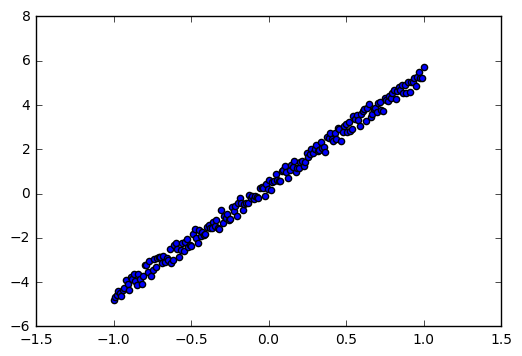

In [2]:
# 生成用来进行线性回归的模拟数据
x = torch.unsqueeze(torch.linspace(-1, 1, 200), dim = 1)
y = 5 * x + 0.8 * torch.rand(x.size())

# 绘制模拟数据的图像
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [3]:
# 为了能够自动求导，我们要将 x, y 变成 Variable 对象
X = Variable(x) # PyTorch中的 Variable 默认是允许自动求导的，所以 requires_grad=True 可以不加
Y = Variable(y) # 同上

Variable containing:
 15.5881
[torch.FloatTensor of size 1]

Variable containing:
 9.0062
[torch.FloatTensor of size 1]

Variable containing:
 8.9860
[torch.FloatTensor of size 1]

Variable containing:
 8.9859
[torch.FloatTensor of size 1]

Variable containing:
 8.9859
[torch.FloatTensor of size 1]



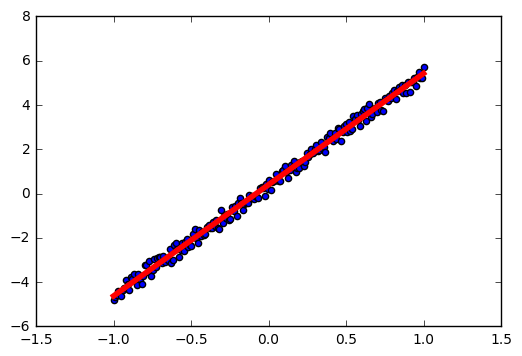

实际的参数w是： 5 

预测的参数w是 Variable containing:
 5.0250
[torch.FloatTensor of size 1x1]

预测的常数项是： Variable containing:
 0.4016
[torch.FloatTensor of size 1x1]



In [4]:
# 定义参数初始化函数
def init_parameters():
    W = Variable( torch.randn(1, 1), requires_grad=True)  # 随机初始化 w
    b = Variable( torch.zeros(1, 1), requires_grad=True )  # 初始化偏差
    parameters = {"W": W, "b": b}
    return parameters

# 定义模型
def model(X, parameters):
    return X * parameters["W"] + parameters["b"]

# 定义损失函数
def square_loss(y_hat, Y):
    loss = (y_hat - Y).pow(2).sum()
    return loss

# 使用梯度来更新参数
def update_parameters(parameters, lr):
    parameters["W"].data -= lr * parameters["W"].grad.data
    parameters["b"].data -= lr * parameters["b"].grad.data
    return

####     超参数     ####
EPOCH = 100 # 迭代次数
learning_rate = 0.001 # 学习速率

parameters = init_parameters() # 参数初始化

####     开始训练     ####
for t in range(EPOCH):
    # 对x进行预测
    y_hat = model(X, parameters)
    # 计算损失
    loss = square_loss(y_hat, Y)
    # 反向求导
    loss.backward()
    # 通过梯度，更新参数
    update_parameters(parameters, learning_rate)
    if (t+1) % 20 == 0:
        print(loss)
    # 因为自动求导会对梯度自动地积累，所以，我们要清除梯度
    parameters["W"].grad.data.zero_()
    parameters["b"].grad.data.zero_()

# 画图
plt.scatter(X.data.numpy(), Y.data.numpy())
plt.plot(X.data.numpy(), y_hat.data.numpy(), 'r-', lw = 4)
plt.show()

print("实际的参数w是： 5 \n" )
print("预测的参数w是", parameters["W"])
print("预测的常数项是：" , parameters["b"])

## 用torch.nn来构建模型

在PyTorch中 nn 包定义了一系列基本组件，这些组件（Modules）涵盖了大部分构建神经网络会使用的各种层。一个组件（Modules）的输入是Variable，经过组件之后，输出又是另一个 Variable。

**当然nn包中还包含了大部分我们平时使用的损失函数**。

**最后torch.optim中还含有很多我们平时使用的优化算法，用来更新梯度**。（我们上面使用的就是梯度下降法，只不过上面是我们自己手写，现在可以直接调用了）

刚才，我们使用的是Tensor和autograd来构建线性回归的模型，现在，我们来使用torch.nn来快速构建一个线性回归模型

Variable containing:
 17.7528
[torch.FloatTensor of size 1]

Variable containing:
 9.0129
[torch.FloatTensor of size 1]

Variable containing:
 8.9860
[torch.FloatTensor of size 1]

Variable containing:
 8.9859
[torch.FloatTensor of size 1]

Variable containing:
 8.9859
[torch.FloatTensor of size 1]



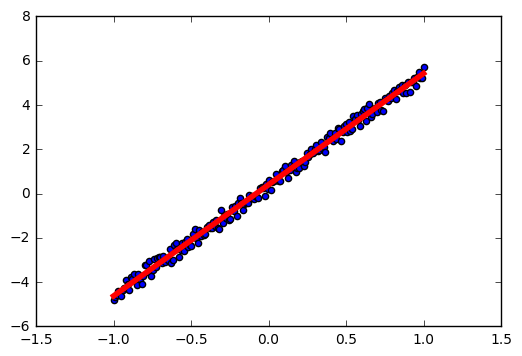

实际的参数w是： 5 

预测的参数w是 Variable containing:
 5.0250
[torch.FloatTensor of size 1x1]

预测的常数项是： Variable containing:
 0.4016
[torch.FloatTensor of size 1x1]



In [5]:
# 还是使用上述的X和Y

X = Variable(x) # PyTorch中的 Variable 默认是允许自动求导的，所以 requires_grad=True 可以不加
Y = Variable(y) # 同上

####     超参数     ####
EPOCH = 100 # 迭代次数
learning_rate = 0.001 # 学习速率


# 定义模型
# 使用 nn包来定义我们的模型，这里的Linear表示的是线性模型，我们在初始化这个模型的时候，
# 需要传入的参数是: in_features, out_features 也就是输出特征和输出特征
# 默认会帮我们初始化权重，当然，我们也可以手动初始化权重（这里暂时不说）
model = nn.Linear(1, 1)

# 定义损失函数
# 我们使用 Mean Square Loss作为我们的损失函数
# size_average=False表示我们需要的是总的误差，不需要去平均误差
square_loss = nn.MSELoss(size_average=False)


# 定义优化方法
# 以前，我们的梯度下降法都是我们手写的，现在，我们可以使用nn为我们封装好的。
# model.parameters()会自动的为我们将模型中的参数提取出来。lr表示的是学习速率
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

####     开始训练     ####
for t in range(EPOCH):
    
    # 没有变化，还是这样使用：对x进行预测
    y_hat = model(X)
    
    # 没有变化，计算损失
    loss = square_loss(y_hat, Y)
    
    # 打印损失
    if (t+1) % 20 == 0:
        print(loss)
    # 在我们反向求导之前，我们需要清空积累的梯度，由于我们使用的是 torch.optim包中的对象，我们可以直接调用
    # 该对象的方法，来自动的清空积累的梯度
    optimizer.zero_grad()
    
    # 反向求导，也没变
    loss.backward()
    
    # 反向求导结束，我们开始更新梯度，以前更新梯度需要手动输入w1.grad.data，现在只需要一行代码就可以搞定了！
    optimizer.step()
    


# 画图
plt.scatter(X.data.numpy(), Y.data.numpy())
plt.plot(X.data.numpy(), y_hat.data.numpy(), 'r-', lw = 4)
plt.show()

print("实际的参数w是： 5 \n" )
print("预测的参数w是", parameters["W"])
print("预测的常数项是：" , parameters["b"])